In [1]:
from IPython.display import display

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("apoorvwatsky/bank-transaction-data")

print("Path to dataset files:", path)

C:\Users\yoav.haimovitch\PycharmProjects\PythonProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\yoav.haimovitch\.cache\kagglehub\datasets\apoorvwatsky\bank-transaction-data\versions\1


In [3]:
import pandas as pd
import os

# The path variable from the previous cell contains the directory where the files were extracted.
# We need to find the actual data file within that directory.
file_list = os.listdir(path)
print("Files in the downloaded dataset directory:", file_list)

# Assuming the data is in an Excel file named 'bank.xlsx'
excel_file_name = 'bank.xlsx'
excel_file_path = os.path.join(path, excel_file_name)

if os.path.exists(excel_file_path):
    print("Reading data from:", excel_file_path)
    # Read the data into a pandas DataFrame
    df = pd.read_excel(excel_file_path)

    # Display the first few rows of the DataFrame
    display(df.head())
else:
    print(f"The file '{excel_file_name}' was not found in the dataset directory.")

Files in the downloaded dataset directory: ['bank.xlsx']
Reading data from: C:\Users\yoav.haimovitch\.cache\kagglehub\datasets\apoorvwatsky\bank-transaction-data\versions\1\bank.xlsx


,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [4]:
account_transactions = df.groupby('Account No').size().reset_index(name='Number of Transactions')
display(account_transactions)

,Account No,Number of Transactions
0,1196428',48779
1,1196711',10536
2,409000362497',29840
3,409000405747',51
4,409000425051',802
5,409000438611',4588
6,409000438620',13454
7,409000493201',1044
8,409000493210',6014
9,409000611074',1093


In [5]:
num_accounts = len(account_transactions)
mean_transactions = account_transactions['Number of Transactions'].mean()
std_transactions = account_transactions['Number of Transactions'].std()

print(f"Number of accounts: {num_accounts}")
print(f"Mean number of transactions per account: {mean_transactions:.2f}")
print(f"Standard deviation of transactions per account: {std_transactions:.2f}")

Number of accounts: 10
Mean number of transactions per account: 11620.10
Standard deviation of transactions per account: 15887.50


In [6]:
from pathlib import Path
import shutil

zipped_dir = "C:/Work/Zips/"
unzipped_dir = "C:/Work/Data/"


In [7]:
def copy_zips(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        file_list = os.listdir(source_dir)

        for file_name in file_list:
            if file_name.endswith(".zip"):
                source_path = os.path.join(source_dir, file_name)
                destination_path = os.path.join(destination_dir, file_name)
                shutil.copy(source_path, destination_path)
                print(f"Copied '{file_name}' to '{destination_dir}'")

In [8]:
import zipfile
import os

if not os.path.exists(unzipped_dir):
    os.makedirs(unzipped_dir)

zip_files = [f for f in os.listdir(zipped_dir) if f.endswith(".zip")]
print("Zip files found:", zip_files)

Zip files found: ['citizens2_include_validations_for_yair.zip', 'VanilaData.zip']


In [9]:
for zip_file_name in zip_files:
    zip_file_path = os.path.join(zipped_dir, zip_file_name)
    destination_folder_name = os.path.splitext(zip_file_name)[0]
    destination_path = os.path.join(unzipped_dir, destination_folder_name)

    if not os.path.exists(destination_path):
        os.makedirs(destination_path)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_path)
    print(f"Extracted '{zip_file_name}' to '{destination_path}'")

Extracted 'citizens2_include_validations_for_yair.zip' to 'C:/Work/Data/citizens2_include_validations_for_yair'
Extracted 'VanilaData.zip' to 'C:/Work/Data/VanilaData'


In [10]:
import os

print("Listing files in the unzipped data directory:")
for root, dirs, files in os.walk(unzipped_dir):
    for file in files:
        print(os.path.join(root, file))

Listing files in the unzipped data directory:
C:/Work/Data/citizens2_include_validations_for_yair\citizens2.zip
C:/Work/Data/citizens2_include_validations_for_yair\OneDrive_2025-11-02.zip
C:/Work/Data/proc\rec_data.csv
C:/Work/Data/VanilaData\Data\DAccount.csv
C:/Work/Data/VanilaData\Data\DAccount.xlsx
C:/Work/Data/VanilaData\Data\DForecastTransaction.csv
C:/Work/Data/VanilaData\Data\DParty.csv
C:/Work/Data/VanilaData\Data\DPartyAccount.csv
C:/Work/Data/VanilaData\Data\DRecurringPattern.csv
C:/Work/Data/VanilaData\Data\DTransaction.csv


In [11]:
import pandas as pd
import os

dataframes = {}

data_dir = Path(unzipped_dir)/"VanilaData/Data"

for file_path in data_dir.glob("*"):
    try:
        df_name = file_path.stem
        if file_path.suffix=='.csv':
            dataframes[df_name] = pd.read_csv(file_path, low_memory=False)
        elif file_path.suffix=='.xlsx':
            dataframes[df_name] = pd.read_excel(file_path)
        print(f"Loaded '{file_path}' into DataFrame '{df_name}'")
    except Exception as e:
        print(f"Error loading '{file_path}': {e}")


Loaded 'C:\Work\Data\VanilaData\Data\DAccount.csv' into DataFrame 'DAccount'
Loaded 'C:\Work\Data\VanilaData\Data\DAccount.xlsx' into DataFrame 'DAccount'
Loaded 'C:\Work\Data\VanilaData\Data\DForecastTransaction.csv' into DataFrame 'DForecastTransaction'
Loaded 'C:\Work\Data\VanilaData\Data\DParty.csv' into DataFrame 'DParty'
Loaded 'C:\Work\Data\VanilaData\Data\DPartyAccount.csv' into DataFrame 'DPartyAccount'
Loaded 'C:\Work\Data\VanilaData\Data\DRecurringPattern.csv' into DataFrame 'DRecurringPattern'
Loaded 'C:\Work\Data\VanilaData\Data\DTransaction.csv' into DataFrame 'DTransaction'


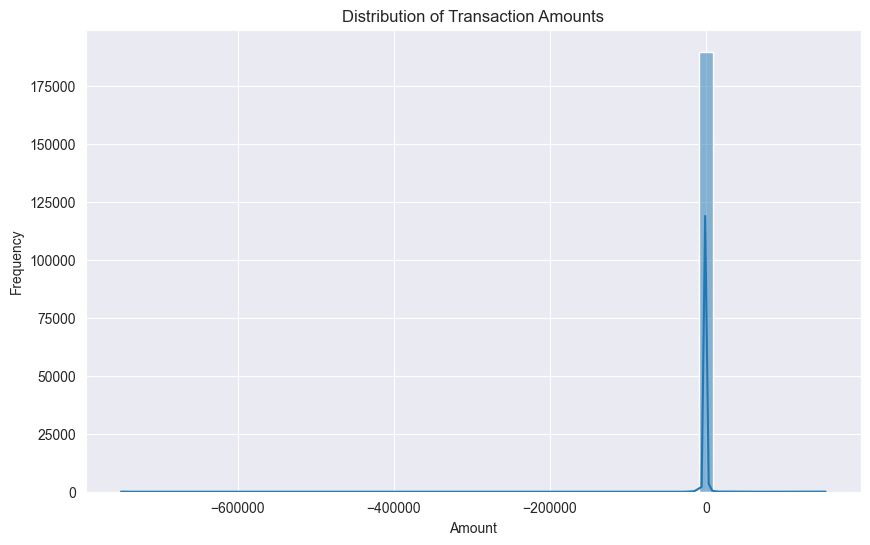


Descriptive statistics for 'amount' column:


count    190097.000000
mean         -2.636215
std        2402.276250
min     -749996.000000
25%           4.240000
50%          18.990000
75%          53.000000
max      153494.000000
Name: amount, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the 'amount' column
plt.figure(figsize=(10, 6))
sns.histplot(dataframes['DTransaction']['amount'].dropna(), bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Also, display some descriptive statistics for the 'amount' column
print("\nDescriptive statistics for 'amount' column:")
display(dataframes['DTransaction']['amount'].describe())

**Reasoning**:
Print the names of the loaded DataFrames to confirm successful loading.



In [13]:
print("\nSuccessfully loaded DataFrames:")
for df_name in dataframes.keys():
    print(df_name)


Successfully loaded DataFrames:
DAccount
DForecastTransaction
DParty
DPartyAccount
DRecurringPattern
DTransaction


In [14]:
for df_name, df in dataframes.items():
    print(f"DataFrame: {df_name}")
    display(df.head())
    df.info()
    print("-" * 30)

DataFrame: DAccount


,user_name,APRBenefitExpireDate,APY,CustomField1,LOB,activationDate,actualRiskToleranceLevel,additionalBalance,authCapability,autoPayFixedAmount,...,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,type,userActivityAmount,waivedMonthlyFees
0,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,1097.93,11.98,1097.93,1253.01,Checking,0.0,False
1,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Savings,NaN,False
2,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Credit,NaN,False
3,C_10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Credit,NaN,False
4,C_10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,710.64,1660.79,1705.79,2055.34,995.15,569.51,Checking,0.0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Columns: 253 entries, user_name to waivedMonthlyFees
dtypes: bool(22), datetime64[ns](1), float64(200), int64(19), object(11)
memory usage: 2.6+ MB
------------------------------
DataFrame: DForecastTransaction


,user_name,accountId,categoryGroupId,description,device,direction,expectedAmount,expectedDate,finalExpectedAmount,finalExpectedDate,forecastType,id,isCardPattern,isIncludedInForecast,isScheduled,originalTxId,patternId,typeId,userId
0,C_12331,A_3273,CG1300,MAINTENANCE,MAINTENANCE FEE,D,-11.95,02/22/2027 00:00:00,-11.95,02/22/2027 00:00:00,monthly,ForecastTransaction_0a325f988c367f6c495196202d...,False,True,False,0a325f988c367f6c495196202da05a92f105630094b570...,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,FEEOTHER,C_12331
1,C_12331,A_3273,CG2600,MEDTOX DIAGNOSTI,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI,C,1091.53,02/19/2027 00:00:00,1091.53,02/19/2027 00:00:00,onceEvery2Weeks,ForecastTransaction_1bc99b5d89048e5a7030c9e567...,False,True,False,1bc99b5d89048e5a7030c9e56748aab78a3e26ce6b98f0...,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,TRANSFEREXTERNALIN,C_12331
2,C_12331,A_3273,CG2600,MEDTOX DIAGNOSTI,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI,C,1091.53,03/05/2027 00:00:00,1091.53,03/05/2027 00:00:00,onceEvery2Weeks,ForecastTransaction_1bc99b5d89048e5a7030c9e567...,False,True,False,1bc99b5d89048e5a7030c9e56748aab78a3e26ce6b98f0...,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,TRANSFEREXTERNALIN,C_12331
3,C_12331,A_3273,CG2200,TOYOTA/LEXUS,Toyota Finance,D,-595.00,03/03/2027 00:00:00,-595.00,03/03/2027 00:00:00,monthly,ForecastTransaction_30cace3e71ce572268a9f1d5c0...,False,True,False,30cace3e71ce572268a9f1d5c025b460f26caa8945ade4...,A_3273_TRANSFEREXTERNALOUT_D_1_TOYOTA FINANCE_...,TRANSFEREXTERNALOUT,C_12331
4,C_12331,A_3273,CG2500,AMERICAN EXPRESS,American Express,D,-205.00,03/03/2027 00:00:00,-205.00,03/03/2027 00:00:00,monthly,ForecastTransaction_66a07080a286137cce69edce34...,True,True,False,66a07080a286137cce69edce348ef752eebba89eaa8a7b...,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,TRANSFERCARDPAYMENTOUT,C_12331


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6958 entries, 0 to 6957
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_name             6958 non-null   object 
 1   accountId             6958 non-null   object 
 2   categoryGroupId       6958 non-null   object 
 3   description           6956 non-null   object 
 4   device                6958 non-null   object 
 5   direction             6958 non-null   object 
 6   expectedAmount        6958 non-null   float64
 7   expectedDate          6958 non-null   object 
 8   finalExpectedAmount   6958 non-null   float64
 9   finalExpectedDate     6958 non-null   object 
 10  forecastType          6958 non-null   object 
 11  id                    6958 non-null   object 
 12  isCardPattern         6958 non-null   bool   
 13  isIncludedInForecast  6958 non-null   bool   
 14  isScheduled           6958 non-null   bool   
 15  originalTxId         

,user_name,CameraAvailability,CustomField2,OSVersion,SSN_TIN,age,appUsage,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,...,serviceLevel,smartphoneType,sumExpensesSP,sustainabilityInterest,tenantId,totalAssets,type,usedApp,usedWebsite,userName
0,C_12331,NaN,NaN,Unknown,NaN,56,Unknown,25302.90,19213.81,NaN,...,NaN,Unknown,6212.09,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
1,C_11973,NaN,NaN,Unknown,NaN,27,Unknown,6580.89,8026.29,NaN,...,NaN,Unknown,11265.29,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
2,C_11088,NaN,NaN,Unknown,NaN,48,Unknown,11873.50,9183.78,NaN,...,NaN,Unknown,14273.43,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
3,C_2182,NaN,NaN,Unknown,NaN,29,Unknown,-940.93,-72.69,NaN,...,NaN,Unknown,2842.64,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
4,C_7437,NaN,NaN,Unknown,NaN,24,Unknown,NaN,NaN,NaN,...,NaN,Unknown,NaN,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 96 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_name                    500 non-null    object 
 1   CameraAvailability           0 non-null      float64
 2   CustomField2                 0 non-null      float64
 3   OSVersion                    500 non-null    object 
 4   SSN_TIN                      0 non-null      float64
 5   age                          500 non-null    int64  
 6   appUsage                     500 non-null    object 
 7   avgBalanceLP                 482 non-null    float64
 8   avgBalanceSP                 482 non-null    float64
 9   balanceIssuesLongTerm        0 non-null      float64
 10  balanceIssuesShortTerm       0 non-null      float64
 11  birthDate                    500 non-null    object 
 12  caaindication                500 non-null    object 
 13  changeBalanceIssuesP

,user_name,accountId,assignDate,clientRelationType,enrolledPaperlessStatement,hasCard,id,isEligiblePaperlessStatement,partyId,policyPurpose,relationType
0,C_12331,A_3273,NaN,CLIENT_JOINT,True,NaN,C_12331_A_3273,True,C_12331,NaN,Joint
1,C_11973,A_1258,NaN,CLIENT_JOINT,True,NaN,C_11973_A_1258,True,C_11973,NaN,Joint
2,C_11973,A_5173,NaN,CLIENT_OWNER,True,NaN,C_11973_A_5173,True,C_11973,NaN,Owner
3,C_11088,A_196,NaN,CLIENT_OWNER,True,NaN,C_11088_A_196,True,C_11088,NaN,Owner
4,C_11088,A_21715,NaN,CLIENT_JOINT,True,NaN,C_11088_A_21715,True,C_11088,NaN,Joint


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_name                     1447 non-null   object 
 1   accountId                     1447 non-null   object 
 2   assignDate                    0 non-null      float64
 3   clientRelationType            1447 non-null   object 
 4   enrolledPaperlessStatement    1447 non-null   bool   
 5   hasCard                       0 non-null      float64
 6   id                            1447 non-null   object 
 7   isEligiblePaperlessStatement  1447 non-null   bool   
 8   partyId                       1447 non-null   object 
 9   policyPurpose                 0 non-null      float64
 10  relationType                  1447 non-null   object 
dtypes: bool(2), float64(3), object(6)
memory usage: 104.7+ KB
------------------------------
DataFrame: DRecurringPattern


,user_name,accountId,avgAmounts,categoryGroupId,confidentLevel,deviceId,direction,expirationDate,firstPatternDate,id,...,patternDOW,patternId,patternRepeatingAmountRatio,patternTypeBusiness,period,segmentsGroupBy,stdAmounts,typeId,userId,userInputEndDate
0,C_12331,A_3273,1621.99,NaN,0.982219,MONEYGRAM_0,D,02/14/2029 00:00:00,10/18/2026 00:00:00,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,...,NaN,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,0.40,MonthlyPayments,4.0,MONEYGRAM_0,549.56,CHARGE,C_12331,NaN
1,C_12331,A_3273,-11.95,NaN,0.999507,MONTHLY MAINTENANCE FEE WAIVED_0,C,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,...,NaN,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,1.00,MonthlyFixedAmount,4.0,MONTHLY MAINTENANCE FEE WAIVED_0,0.00,FEEOTHER,C_12331,NaN
2,C_12331,A_3273,11.95,NaN,0.999485,MAINTENANCE FEE_0,D,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,...,NaN,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,1.00,MonthlyFixedAmount,4.0,MAINTENANCE FEE_0,0.00,FEEOTHER,C_12331,NaN
3,C_12331,A_3273,205.00,NaN,0.999262,AMERICAN EXPRESS_0,D,02/14/2029 00:00:00,11/03/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,1.00,NoisyDateOfMonth,4.0,AMERICAN EXPRESS_0,0.00,TRANSFERCARDPAYMENTOUT,C_12331,NaN
4,C_12331,A_3273,122.32,NaN,0.999070,XCEL ENERGY_0,D,02/14/2029 00:00:00,10/30/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,0.25,MonthlyPayments,4.0,XCEL ENERGY_0,8.98,TRANSFERCARDPAYMENTOUT,C_12331,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_name                    5938 non-null   object 
 1   accountId                    5938 non-null   object 
 2   avgAmounts                   5938 non-null   float64
 3   categoryGroupId              203 non-null    object 
 4   confidentLevel               5779 non-null   float64
 5   deviceId                     5938 non-null   object 
 6   direction                    5938 non-null   object 
 7   expirationDate               5938 non-null   object 
 8   firstPatternDate             5938 non-null   object 
 9   id                           5938 non-null   object 
 10  inactivityEndDate            0 non-null      float64
 11  inactivitySource             0 non-null      float64
 12  isActive                     5938 non-null   bool   
 13  isAutomatic       

,user_name,CustomField3,academicPreparation,accountId,activityClass,advanced_clean_desc,agedDebt,amount,amountChargeCurrency,amountLocalCurrency,...,personeticstransactionpurpose,subscriptioncycle,subscriptionisnew,subscriptionnextpaymentamt,subscriptionnextpaymentdate,transactionamount,transactiondate,transactiondescription,feesubtype,transfersubtype
0,C_12331,NaN,NaN,A_3273,NaN,DEPOSIT,NaN,-555.00,555.00,555.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C_12331,NaN,NaN,A_3273,NaN,MEDTOX DIAGNOSTI,NaN,-1090.51,1090.51,1090.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_12331,NaN,NaN,A_3273,NaN,DISCOVER,NaN,63.73,-63.73,-63.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_12331,NaN,NaN,A_3273,NaN,CENTERPOINT ENERGY,NaN,133.16,-133.16,-133.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_12331,NaN,NaN,A_3273,NaN,SHELLPOINT MORTGAGE,NaN,6505.00,-6505.00,-6505.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190097 entries, 0 to 190096
Columns: 283 entries, user_name to transfersubtype
dtypes: bool(43), float64(98), int64(11), object(131)
memory usage: 355.9+ MB
------------------------------


In [15]:
df_party_account = pd.merge(dataframes['DParty'], dataframes['DAccount'], on='user_name', how='left')
dataframes['DPartyAccount_merged'] = df_party_account

print("Merged DataFrames 'DParty' and 'DAccount' into 'DPartyAccount_merged'.")

Merged DataFrames 'DParty' and 'DAccount' into 'DPartyAccount_merged'.


In [16]:
for df_name, df in dataframes.items():
    print(f"--- Displaying head of {df_name} ---")
    display(df.head())
    print(f"--- Displaying summary statistics of {df_name} ---")
    display(df.describe())
    print("\n")

--- Displaying head of DAccount ---


,user_name,APRBenefitExpireDate,APY,CustomField1,LOB,activationDate,actualRiskToleranceLevel,additionalBalance,authCapability,autoPayFixedAmount,...,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,type,userActivityAmount,waivedMonthlyFees
0,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,1097.93,11.98,1097.93,1253.01,Checking,0.0,False
1,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Savings,NaN,False
2,C_10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Credit,NaN,False
3,C_10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Credit,NaN,False
4,C_10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,710.64,1660.79,1705.79,2055.34,995.15,569.51,Checking,0.0,False


--- Displaying summary statistics of DAccount ---


,APRBenefitExpireDate,APY,CustomField1,LOB,activationDate,actualRiskToleranceLevel,additionalBalance,authCapability,autoPayFixedAmount,autoPayMethodId,...,stdUnexpectedIn,stdUnexpectedOut,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,userActivityAmount
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,676.000000,676.000000,0.0,676.000000,1447.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1760.227130,1474.361376,NaN,1390.732101,720.755031,5251.559956,6079.473521,3860.827855,746.519704,265.654009
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,-498.980000,0.000000,0.000000,0.000000,-106654.930000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.535000,176.802500,NaN,4.782500,0.000000,1142.670000,1448.375000,872.067500,-1327.747500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,272.890000,419.745000,NaN,197.370000,0.000000,2830.665000,3420.870000,2270.590000,0.775000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,859.525000,1002.005000,NaN,813.715000,772.255000,5258.277500,6469.107500,4372.650000,953.012500,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,318559.490000,84921.000000,NaN,213553.490000,16604.950000,217525.440000,242506.200000,123009.570000,393529.700000,86834.480000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12882.134083,5473.789870,NaN,10041.956574,1564.819252,13870.878786,14660.478492,7832.874490,18691.745837,3385.528166




--- Displaying head of DForecastTransaction ---


,user_name,accountId,categoryGroupId,description,device,direction,expectedAmount,expectedDate,finalExpectedAmount,finalExpectedDate,forecastType,id,isCardPattern,isIncludedInForecast,isScheduled,originalTxId,patternId,typeId,userId
0,C_12331,A_3273,CG1300,MAINTENANCE,MAINTENANCE FEE,D,-11.95,02/22/2027 00:00:00,-11.95,02/22/2027 00:00:00,monthly,ForecastTransaction_0a325f988c367f6c495196202d...,False,True,False,0a325f988c367f6c495196202da05a92f105630094b570...,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,FEEOTHER,C_12331
1,C_12331,A_3273,CG2600,MEDTOX DIAGNOSTI,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI,C,1091.53,02/19/2027 00:00:00,1091.53,02/19/2027 00:00:00,onceEvery2Weeks,ForecastTransaction_1bc99b5d89048e5a7030c9e567...,False,True,False,1bc99b5d89048e5a7030c9e56748aab78a3e26ce6b98f0...,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,TRANSFEREXTERNALIN,C_12331
2,C_12331,A_3273,CG2600,MEDTOX DIAGNOSTI,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI,C,1091.53,03/05/2027 00:00:00,1091.53,03/05/2027 00:00:00,onceEvery2Weeks,ForecastTransaction_1bc99b5d89048e5a7030c9e567...,False,True,False,1bc99b5d89048e5a7030c9e56748aab78a3e26ce6b98f0...,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,TRANSFEREXTERNALIN,C_12331
3,C_12331,A_3273,CG2200,TOYOTA/LEXUS,Toyota Finance,D,-595.00,03/03/2027 00:00:00,-595.00,03/03/2027 00:00:00,monthly,ForecastTransaction_30cace3e71ce572268a9f1d5c0...,False,True,False,30cace3e71ce572268a9f1d5c025b460f26caa8945ade4...,A_3273_TRANSFEREXTERNALOUT_D_1_TOYOTA FINANCE_...,TRANSFEREXTERNALOUT,C_12331
4,C_12331,A_3273,CG2500,AMERICAN EXPRESS,American Express,D,-205.00,03/03/2027 00:00:00,-205.00,03/03/2027 00:00:00,monthly,ForecastTransaction_66a07080a286137cce69edce34...,True,True,False,66a07080a286137cce69edce348ef752eebba89eaa8a7b...,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,TRANSFERCARDPAYMENTOUT,C_12331


--- Displaying summary statistics of DForecastTransaction ---


,expectedAmount,finalExpectedAmount
count,6958.000000,6958.000000
mean,-1.599521,-1.599521
std,2039.616351,2039.616351
min,-108920.520000,-108920.520000
25%,-91.000000,-91.000000
50%,-16.990000,-16.990000
75%,6.950000,6.950000
max,9995.000000,9995.000000




--- Displaying head of DParty ---


,user_name,CameraAvailability,CustomField2,OSVersion,SSN_TIN,age,appUsage,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,...,serviceLevel,smartphoneType,sumExpensesSP,sustainabilityInterest,tenantId,totalAssets,type,usedApp,usedWebsite,userName
0,C_12331,NaN,NaN,Unknown,NaN,56,Unknown,25302.90,19213.81,NaN,...,NaN,Unknown,6212.09,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
1,C_11973,NaN,NaN,Unknown,NaN,27,Unknown,6580.89,8026.29,NaN,...,NaN,Unknown,11265.29,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
2,C_11088,NaN,NaN,Unknown,NaN,48,Unknown,11873.50,9183.78,NaN,...,NaN,Unknown,14273.43,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
3,C_2182,NaN,NaN,Unknown,NaN,29,Unknown,-940.93,-72.69,NaN,...,NaN,Unknown,2842.64,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN
4,C_7437,NaN,NaN,Unknown,NaN,24,Unknown,NaN,NaN,NaN,...,NaN,Unknown,NaN,NaN,NaN,NaN,8c2574892063f995fdf756bce07f46c1a5193e54cd5283...,False,False,NaN


--- Displaying summary statistics of DParty ---


,CameraAvailability,CustomField2,SSN_TIN,age,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,balanceIssuesShortTerm,changeBalanceIssuesPercent,changeInAssetsPercent,...,phoneMobile,phoneWork,policyPurpose,recurringModelRunDate,serviceLevel,sumExpensesSP,sustainabilityInterest,tenantId,totalAssets,userName
count,0.0,0.0,0.0,500.000000,482.000000,482.000000,0.0,0.0,500.000000,482.000000,...,0.0,0.0,0.0,0.0,0.0,482.000000,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,46.792000,12333.858029,12816.436909,NaN,NaN,-0.059140,0.781328,...,NaN,NaN,NaN,NaN,NaN,7380.127842,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,15.349265,47416.694867,48883.361338,NaN,NaN,0.281178,17.400783,...,NaN,NaN,NaN,NaN,NaN,18919.570672,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,20.000000,-24591.770000,-24298.300000,NaN,NaN,-1.000000,-17.540000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,34.000000,674.377500,519.400000,NaN,NaN,0.000000,-0.450000,...,NaN,NaN,NaN,NaN,NaN,2060.035000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,47.000000,2882.960000,2628.315000,NaN,NaN,0.000000,-0.085000,...,NaN,NaN,NaN,NaN,NaN,3800.840000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,60.000000,9159.177500,9800.265000,NaN,NaN,0.000000,0.130000,...,NaN,NaN,NaN,NaN,NaN,6979.815000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,73.000000,848002.940000,800931.730000,NaN,NaN,1.400000,377.550000,...,NaN,NaN,NaN,NaN,NaN,240918.920000,NaN,NaN,NaN,NaN




--- Displaying head of DPartyAccount ---


,user_name,accountId,assignDate,clientRelationType,enrolledPaperlessStatement,hasCard,id,isEligiblePaperlessStatement,partyId,policyPurpose,relationType
0,C_12331,A_3273,NaN,CLIENT_JOINT,True,NaN,C_12331_A_3273,True,C_12331,NaN,Joint
1,C_11973,A_1258,NaN,CLIENT_JOINT,True,NaN,C_11973_A_1258,True,C_11973,NaN,Joint
2,C_11973,A_5173,NaN,CLIENT_OWNER,True,NaN,C_11973_A_5173,True,C_11973,NaN,Owner
3,C_11088,A_196,NaN,CLIENT_OWNER,True,NaN,C_11088_A_196,True,C_11088,NaN,Owner
4,C_11088,A_21715,NaN,CLIENT_JOINT,True,NaN,C_11088_A_21715,True,C_11088,NaN,Joint


--- Displaying summary statistics of DPartyAccount ---


,assignDate,hasCard,policyPurpose
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN




--- Displaying head of DRecurringPattern ---


,user_name,accountId,avgAmounts,categoryGroupId,confidentLevel,deviceId,direction,expirationDate,firstPatternDate,id,...,patternDOW,patternId,patternRepeatingAmountRatio,patternTypeBusiness,period,segmentsGroupBy,stdAmounts,typeId,userId,userInputEndDate
0,C_12331,A_3273,1621.99,NaN,0.982219,MONEYGRAM_0,D,02/14/2029 00:00:00,10/18/2026 00:00:00,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,...,NaN,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,0.40,MonthlyPayments,4.0,MONEYGRAM_0,549.56,CHARGE,C_12331,NaN
1,C_12331,A_3273,-11.95,NaN,0.999507,MONTHLY MAINTENANCE FEE WAIVED_0,C,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,...,NaN,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,1.00,MonthlyFixedAmount,4.0,MONTHLY MAINTENANCE FEE WAIVED_0,0.00,FEEOTHER,C_12331,NaN
2,C_12331,A_3273,11.95,NaN,0.999485,MAINTENANCE FEE_0,D,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,...,NaN,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,1.00,MonthlyFixedAmount,4.0,MAINTENANCE FEE_0,0.00,FEEOTHER,C_12331,NaN
3,C_12331,A_3273,205.00,NaN,0.999262,AMERICAN EXPRESS_0,D,02/14/2029 00:00:00,11/03/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,1.00,NoisyDateOfMonth,4.0,AMERICAN EXPRESS_0,0.00,TRANSFERCARDPAYMENTOUT,C_12331,NaN
4,C_12331,A_3273,122.32,NaN,0.999070,XCEL ENERGY_0,D,02/14/2029 00:00:00,10/30/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,0.25,MonthlyPayments,4.0,XCEL ENERGY_0,8.98,TRANSFERCARDPAYMENTOUT,C_12331,NaN


--- Displaying summary statistics of DRecurringPattern ---


,avgAmounts,confidentLevel,inactivityEndDate,inactivitySource,lastCycleAmount,mostFrequentRepeatingAmount,nextOccurrence2Amount,nextOccurrence3Amount,nextOccurrence4Amount,nextOccurrenceAmount,numPatternTxs,patternDOM,patternRepeatingAmountRatio,period,stdAmounts,userInputEndDate
count,5938.000000,5779.000000,0.0,0.0,5938.000000,5061.000000,5852.000000,153.000000,153.000000,5938.000000,5938.000000,5779.000000,5779.000000,5779.000000,5938.000000,0.0
mean,27.439983,0.989854,NaN,NaN,35.010487,21.776724,-32.004067,240.351438,240.351438,-27.622275,4.557427,4.902059,0.797641,4.193459,55.565824,NaN
std,1475.222958,0.041223,NaN,NaN,1652.318031,570.894502,1663.882262,763.097541,763.097541,1571.864496,2.270377,7.481934,0.293668,0.591229,573.284338,NaN
min,-9655.990000,0.100606,NaN,NaN,-11885.960000,-9995.000000,-108920.520000,-4356.120000,-4356.120000,-101627.110000,1.000000,0.000000,0.050000,4.000000,0.000000,NaN
25%,1.042500,0.997427,NaN,NaN,1.000000,2.000000,-91.992500,-28.000000,-28.000000,-92.000000,4.000000,0.000000,0.500000,4.000000,0.000000,NaN
50%,18.950000,0.999400,NaN,NaN,18.950000,17.000000,-18.670000,91.000000,91.000000,-18.950000,4.000000,0.000000,1.000000,4.000000,0.000000,NaN
75%,96.000000,0.999843,NaN,NaN,95.000000,85.000000,-1.000000,477.370000,477.370000,-1.000000,4.000000,9.000000,1.000000,4.000000,6.220000,NaN
max,91531.510000,1.000000,NaN,NaN,107111.780000,7179.000000,9995.000000,4820.850000,4820.850000,9995.000000,21.000000,26.000000,1.000000,6.000000,40036.980000,NaN




--- Displaying head of DTransaction ---


,user_name,CustomField3,academicPreparation,accountId,activityClass,advanced_clean_desc,agedDebt,amount,amountChargeCurrency,amountLocalCurrency,...,personeticstransactionpurpose,subscriptioncycle,subscriptionisnew,subscriptionnextpaymentamt,subscriptionnextpaymentdate,transactionamount,transactiondate,transactiondescription,feesubtype,transfersubtype
0,C_12331,NaN,NaN,A_3273,NaN,DEPOSIT,NaN,-555.00,555.00,555.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C_12331,NaN,NaN,A_3273,NaN,MEDTOX DIAGNOSTI,NaN,-1090.51,1090.51,1090.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_12331,NaN,NaN,A_3273,NaN,DISCOVER,NaN,63.73,-63.73,-63.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_12331,NaN,NaN,A_3273,NaN,CENTERPOINT ENERGY,NaN,133.16,-133.16,-133.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_12331,NaN,NaN,A_3273,NaN,SHELLPOINT MORTGAGE,NaN,6505.00,-6505.00,-6505.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--- Displaying summary statistics of DTransaction ---


,CustomField3,activityClass,agedDebt,amount,amountChargeCurrency,amountLocalCurrency,amountOriginal,amountOriginalCurrency,annualAVGAmount,annualSTDAmount,...,userInputMCC,userInputPurposeDate,userInputSubCategoryDate,userInputSubCategoryId,userInputTag,userInputTransactionPurpose,varCd,annualpaymentamount,subscriptionnextpaymentamt,transactionamount
count,0.0,0.0,0.0,190097.000000,190097.000000,190097.000000,190097.000000,190097.000000,8894.000000,3478.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4889.000000,1487.000000,4889.000000
mean,NaN,NaN,NaN,-2.636215,2.636215,2.636215,2.636215,-9.106948,90.783058,15.456293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.782450,30.729038,28.786398
std,NaN,NaN,NaN,2402.276250,2402.276250,2402.276250,2402.276250,1170.345586,43.949691,50.876085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.861203,45.269815,43.776254
min,NaN,NaN,NaN,-749996.000000,-153494.000000,-153494.000000,-153494.000000,-490000.000000,11.490000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120000,0.010000,0.010000
25%,NaN,NaN,NaN,4.240000,-53.000000,-53.000000,-53.000000,0.000000,72.500000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.880000,7.500000,6.990000
50%,NaN,NaN,NaN,18.990000,-18.990000,-18.990000,-18.990000,0.000000,98.000000,7.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.640000,14.990000,13.990000
75%,NaN,NaN,NaN,53.000000,-4.240000,-4.240000,-4.240000,0.000000,98.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.240000,29.215000,26.380000
max,NaN,NaN,NaN,153494.000000,749996.000000,749996.000000,749996.000000,5.550000,2240.000000,2662.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9464.000000,380.000000,509.750000




--- Displaying head of DPartyAccount_merged ---


,user_name,CameraAvailability,CustomField2,OSVersion,SSN_TIN,age,appUsage,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,...,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP_y,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,type_y,userActivityAmount,waivedMonthlyFees
0,C_12331,NaN,NaN,Unknown,NaN,56,Unknown,25302.90,19213.81,NaN,...,NaN,1130.04,2019.99,6212.09,10595.87,5082.05,14852.44,Checking,0.0,False
1,C_11973,NaN,NaN,Unknown,NaN,27,Unknown,6580.89,8026.29,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Savings,NaN,False
2,C_11973,NaN,NaN,Unknown,NaN,27,Unknown,6580.89,8026.29,NaN,...,NaN,2137.64,1406.17,11265.29,5135.53,9127.65,1958.09,Checking,0.0,False
3,C_11088,NaN,NaN,Unknown,NaN,48,Unknown,11873.50,9183.78,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,Credit,NaN,False
4,C_11088,NaN,NaN,Unknown,NaN,48,Unknown,11873.50,9183.78,NaN,...,NaN,0.00,759.75,2042.87,1473.27,2042.87,-2739.53,Checking,0.0,False


--- Displaying summary statistics of DPartyAccount_merged ---


,CameraAvailability,CustomField2,SSN_TIN,age,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,balanceIssuesShortTerm,changeBalanceIssuesPercent_x,changeInAssetsPercent,...,stdUnexpectedIn,stdUnexpectedOut,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP_y,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,userActivityAmount
count,0.0,0.0,0.0,1447.000000,1424.000000,1424.000000,0.0,0.0,1447.000000,1424.000000,...,676.000000,676.000000,0.0,676.000000,1447.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,NaN,NaN,NaN,47.856945,23106.709951,23675.536959,NaN,NaN,-0.057996,0.809698,...,1760.227130,1474.361376,NaN,1390.732101,720.755031,5251.559956,6079.473521,3860.827855,746.519704,265.654009
min,NaN,NaN,NaN,20.000000,-24591.770000,-24298.300000,NaN,NaN,-1.000000,-17.540000,...,0.000000,0.000000,NaN,0.000000,-498.980000,0.000000,0.000000,0.000000,-106654.930000,0.000000
25%,NaN,NaN,NaN,36.000000,1355.530000,1224.290000,NaN,NaN,0.000000,-0.310000,...,23.535000,176.802500,NaN,4.782500,0.000000,1142.670000,1448.375000,872.067500,-1327.747500,0.000000
50%,NaN,NaN,NaN,48.000000,5020.060000,5011.200000,NaN,NaN,0.000000,-0.020000,...,272.890000,419.745000,NaN,197.370000,0.000000,2830.665000,3420.870000,2270.590000,0.775000,0.000000
75%,NaN,NaN,NaN,61.000000,16986.860000,17869.540000,NaN,NaN,0.000000,0.142500,...,859.525000,1002.005000,NaN,813.715000,772.255000,5258.277500,6469.107500,4372.650000,953.012500,0.000000
max,NaN,NaN,NaN,73.000000,848002.940000,800931.730000,NaN,NaN,1.400000,377.550000,...,318559.490000,84921.000000,NaN,213553.490000,16604.950000,217525.440000,242506.200000,123009.570000,393529.700000,86834.480000
std,NaN,NaN,NaN,15.387781,79293.146250,78718.646065,NaN,NaN,0.263124,17.458915,...,12882.134083,5473.789870,NaN,10041.956574,1564.819252,13870.878786,14660.478492,7832.874490,18691.745837,3385.528166


In [17]:
# Split recurring transactions into positive and negative amounts
recurring_deposits = dataframes['DRecurringPattern'][dataframes['DRecurringPattern']['avgAmounts'] > 0].copy()
recurring_outgoing = dataframes['DRecurringPattern'][dataframes['DRecurringPattern']['avgAmounts'] <= 0].copy()

print("Number of recurring deposit patterns:", len(recurring_deposits))
print("Number of recurring outgoing patterns:", len(recurring_outgoing))

print("\nHead of Recurring Deposit Patterns:")
display(recurring_deposits.head())

print("\nHead of Recurring Outgoing Patterns:")
display(recurring_outgoing.head())

Number of recurring deposit patterns: 4528
Number of recurring outgoing patterns: 1410

Head of Recurring Deposit Patterns:


,user_name,accountId,avgAmounts,categoryGroupId,confidentLevel,deviceId,direction,expirationDate,firstPatternDate,id,...,patternDOW,patternId,patternRepeatingAmountRatio,patternTypeBusiness,period,segmentsGroupBy,stdAmounts,typeId,userId,userInputEndDate
0,C_12331,A_3273,1621.99,NaN,0.982219,MONEYGRAM_0,D,02/14/2029 00:00:00,10/18/2026 00:00:00,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,...,NaN,A_3273_CHARGE_D_1_MONEYGRAM_0_0_0_period_4_3_0...,0.40,MonthlyPayments,4.0,MONEYGRAM_0,549.56,CHARGE,C_12331,NaN
2,C_12331,A_3273,11.95,NaN,0.999485,MAINTENANCE FEE_0,D,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,...,NaN,A_3273_FEEOTHER_D_1_MAINTENANCE FEE_0_0_0_peri...,1.00,MonthlyFixedAmount,4.0,MAINTENANCE FEE_0,0.00,FEEOTHER,C_12331,NaN
3,C_12331,A_3273,205.00,NaN,0.999262,AMERICAN EXPRESS_0,D,02/14/2029 00:00:00,11/03/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_AMERICAN EXP...,1.00,NoisyDateOfMonth,4.0,AMERICAN EXPRESS_0,0.00,TRANSFERCARDPAYMENTOUT,C_12331,NaN
4,C_12331,A_3273,122.32,NaN,0.999070,XCEL ENERGY_0,D,02/14/2029 00:00:00,10/30/2026 00:00:00,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,...,NaN,A_3273_TRANSFERCARDPAYMENTOUT_D_1_XCEL ENERGY_...,0.25,MonthlyPayments,4.0,XCEL ENERGY_0,8.98,TRANSFERCARDPAYMENTOUT,C_12331,NaN
7,C_12331,A_3273,595.00,NaN,0.999367,TOYOTA FINANCE_0,D,02/14/2029 00:00:00,10/30/2026 00:00:00,A_3273_TRANSFEREXTERNALOUT_D_1_TOYOTA FINANCE_...,...,NaN,A_3273_TRANSFEREXTERNALOUT_D_1_TOYOTA FINANCE_...,1.00,DateOfMonth,4.0,TOYOTA FINANCE_0,0.00,TRANSFEREXTERNALOUT,C_12331,NaN



Head of Recurring Outgoing Patterns:


,user_name,accountId,avgAmounts,categoryGroupId,confidentLevel,deviceId,direction,expirationDate,firstPatternDate,id,...,patternDOW,patternId,patternRepeatingAmountRatio,patternTypeBusiness,period,segmentsGroupBy,stdAmounts,typeId,userId,userInputEndDate
1,C_12331,A_3273,-11.95,NaN,0.999507,MONTHLY MAINTENANCE FEE WAIVED_0,C,02/14/2029 00:00:00,10/21/2026 00:00:00,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,...,NaN,A_3273_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,1.00,MonthlyFixedAmount,4.0,MONTHLY MAINTENANCE FEE WAIVED_0,0.00,FEEOTHER,C_12331,NaN
5,C_12331,A_3273,-4611.68,NaN,0.999949,ELECTRONIC DEPOSIT COMPANY_0,C,02/14/2029 00:00:00,10/30/2026 00:00:00,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,...,NaN,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,0.75,DateOfMonth,4.0,ELECTRONIC DEPOSIT COMPANY_0,2.65,TRANSFEREXTERNALIN,C_12331,NaN
6,C_12331,A_3273,-1096.02,NaN,0.999875,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI_0,C,02/14/2029 00:00:00,10/16/2026 00:00:00,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,...,Friday,A_3273_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,0.11,DayOfWeek,4.0,ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI_0,20.36,TRANSFEREXTERNALIN,C_12331,NaN
16,C_11973,A_5173,-3.95,NaN,0.999398,MONTHLY MAINTENANCE FEE WAIVED_0,C,02/14/2029 00:00:00,10/23/2026 00:00:00,A_5173_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,...,NaN,A_5173_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WA...,1.00,MonthlyFixedAmount,4.0,MONTHLY MAINTENANCE FEE WAIVED_0,0.00,FEEOTHER,C_11973,NaN
25,C_11973,A_5173,-150.00,NaN,0.999442,ELECTRONIC DEPOSIT OREGON_0,C,02/14/2029 00:00:00,10/05/2026 00:00:00,A_5173_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,...,NaN,A_5173_TRANSFEREXTERNALIN_C_1_ELECTRONIC DEPOS...,1.00,NoisyDateOfMonth,6.0,ELECTRONIC DEPOSIT OREGON_0,0.00,TRANSFEREXTERNALIN,C_11973,NaN


In [18]:
print("Unique values and their counts for 'patternCycle':")
print(dataframes['DRecurringPattern']['patternCycle'].value_counts())

print("\nUnique values and their counts for 'period':")
print(dataframes['DRecurringPattern']['period'].value_counts())

Unique values and their counts for 'patternCycle':
patternCycle
monthly            5362
onceEvery2Weeks     268
onceAWeek           151
twiceAMonth          60
annual               45
onceEvery4Weeks      24
weekBasedOther       16
every4_5Weeks         9
biMonthly             2
quarterly             1
Name: count, dtype: int64

Unique values and their counts for 'period':
period
4.0    5220
6.0     559
Name: count, dtype: int64


In [19]:
for df_name, df in dataframes.items():
    print(f"--- Data Health Check for {df_name} ---")
    print("Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("-" * 30)
    print("\n")

--- Data Health Check for DAccount ---
Data Types:
user_name                   object
APRBenefitExpireDate       float64
APY                        float64
CustomField1               float64
LOB                        float64
                            ...   
sumNotAutoTxSP             float64
totalCashflowAllHistory    float64
type                        object
userActivityAmount         float64
waivedMonthlyFees             bool
Length: 253, dtype: object

Missing Values:
user_name                     0
APRBenefitExpireDate       1447
APY                        1447
CustomField1               1447
LOB                        1447
                           ... 
sumNotAutoTxSP              771
totalCashflowAllHistory     771
type                          0
userActivityAmount          771
waivedMonthlyFees             0
Length: 253, dtype: int64
------------------------------


--- Data Health Check for DForecastTransaction ---
Data Types:
user_name                object
accountId     

In [20]:
dataframes['DRecurringPattern']['isAutomatic']

0          Manual
1          Manual
2          Manual
3          Manual
4          Manual
          ...    
5933       Manual
5934    Automatic
5935    Automatic
5936    Automatic
5937    Automatic
Name: isAutomatic, Length: 5938, dtype: object

In [21]:
import re
from collections import defaultdict
import warnings

columns_by_type = defaultdict(list)


text_columns = {}

for df_name, df in dataframes.items():
    print(f"Checking '{df_name}' for text columns:")
    for col in df.columns:
        # Check if the dtype is object and if there are non-numeric, non-datetime values
        columns_by_type[df[col].dtype].append(col)
        if df[col].dtype == 'object':
            try:
                # Attempt to convert to numeric, if it fails, it's likely text or mixed
                pd.to_numeric(df[col])
            except (ValueError, TypeError):
                try:
                    # Attempt to convert to datetime, if it fails, it's likely text or mixed
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        pd.to_datetime(df[col])
                except (ValueError, TypeError):
                    # If it's not purely numeric or datetime, consider it a potential text column
                    # Also exclude columns that are mostly missing or have very few unique values that might be codes
                    # if df[col].count() > 0 and df[col].nunique() > 10: # Heuristic to exclude
                    if df[col].nunique() > len(df)/4 :
                        sample_values = df[col].dropna().sample(min(5, df[col].dropna().shape[0])).tolist()
                        flag = True
                        same_len = True
                        prev_len = 0
                        for s in sample_values:
                            # flag = flag and len(re.findall(r'[_ \t]', s))>1
                            flag = flag and len(re.findall(r'[A-Za-z]', s))>5
                            if not prev_len:
                                prev_len = len(s)
                            if prev_len and prev_len != len(s):
                                same_len = False

                        if not flag:
                            continue

                        if same_len:
                            continue

                        text_columns[f"{df_name} - {col}"] = sample_values
                        print(f"  - Found potential text column '{col}'. Example values:")
                        for val in sample_values:
                            print(f"    - {val}")
    print("-" * 30)

if not text_columns:
    print("No potential free text columns found based on the criteria.")

Checking 'DAccount' for text columns:
------------------------------
Checking 'DForecastTransaction' for text columns:
  - Found potential text column 'id'. Example values:
    - ForecastTransaction_8dab786f25cf7b92eefdde1267f9bba041e403ab4c2a2f2f0a6009bef583dbdd_A_15910_TRANSFERCARDPAYMENTOUT_D_1_NICOR GAS_0_0_0_period_4_3_0_02/15/2027_00:00_2
    - ForecastTransaction_f0ddb7c5d96eec5eb3814b7467c6c2378cc43709f0d729f2eab1e0bce008af8f_A_2697_FEEOTHER_C_1_MONTHLY MAINTENANCE FEE WAIVED_0_0_0_period_4_3_0_02/15/2027_00:00_1
    - ForecastTransaction_bff4b2a30af86b2d5c52b0b8936643eed37b302f054237bd22f834c4627579bb_A_32271_CHARGE_D_1_APPLE BILL_0_0_0_period_4_3_0_02/15/2027_00:00_1
    - ForecastTransaction_a1c7b9081bc26b1722f295b3abd06e68d6b3945cce234135704b995765e18dbc_A_14635_CREDITOTHER_C_1_REAL TIME PAYMENT CREDIT_0_0_0_period_4_16_0_02/15/2027_00:00_1
    - ForecastTransaction_94f7f0fdc8c4d4f227f2abb45fe6e1bcca4ee8529afae361a3bc3b066a4bbb28_A_29506_TRANSFERINTERNALIN_C_2_FUND_0_0_peri

In [22]:
for k,v in text_columns.items():
    print (k.strip(),' << \t\t' ,v[0].strip()[:40])

DForecastTransaction - id  << 		 ForecastTransaction_8dab786f25cf7b92eefd
DForecastTransaction - patternId  << 		 A_6466_TRANSFERCARDPAYMENTOUT_D_1_NORTHW
DRecurringPattern - deviceId  << 		 FEDERAL STUDENT LOAN_0
DRecurringPattern - id  << 		 A_31097_FEEOTHER_D_1_MAINTENANCE FEE_0_0
DRecurringPattern - patternId  << 		 A_12380_TRANSFERINTERNALIN_C_1_FUNDS TRA
DTransaction - bankRawDescription  << 		 MOBILE PAYMENT THANK YOU
DTransaction - highNetWorth  << 		 {"id":"79b7e6efe2da15079adbb6f21895438e8


In [23]:
for k,v in columns_by_type.items():
    print(k,'\t',v)

object 	 ['user_name', 'bank', 'branchId', 'clientAccountStatus', 'clientAccountType', 'currencyCd', 'id', 'name', 'programId', 'status', 'type', 'user_name', 'accountId', 'categoryGroupId', 'description', 'device', 'direction', 'expectedDate', 'finalExpectedDate', 'forecastType', 'id', 'originalTxId', 'patternId', 'typeId', 'userId', 'user_name', 'OSVersion', 'appUsage', 'birthDate', 'caaindication', 'createDate', 'email', 'hasDecreaseInAssets', 'hasDecreaseNumberOfTxs', 'hasIncreaseInAssets', 'hasIncreaseNumberOfTxs', 'id', 'locationId', 'minAssetsDateSP', 'name', 'persoEngagementLevel', 'smartphoneType', 'type', 'user_name', 'accountId', 'clientRelationType', 'id', 'partyId', 'relationType', 'user_name', 'accountId', 'categoryGroupId', 'deviceId', 'direction', 'expirationDate', 'firstPatternDate', 'id', 'isAutomatic', 'isBiMonthlyPattern', 'isEOMBased', 'isLastCycleAmountConstant', 'isWeekBased', 'lastPatternDate', 'lastPatternDescription', 'lastPatternDeviceId', 'lastPatternTransac

## Summary:

### Data Analysis Key Findings

*   Two zip files, `citizens2_include_validations_for_yair.zip` and `VanilaData.zip`, were successfully copied from Google Drive and unzipped.
*   The unzipped data contained several files with `.csv` and `.xlsx` extensions, indicating potential data files, including `DAccount.xlsx`, `DRecurringPattern.csv`, `DParty.csv`, `DPartyAccount.csv`, `DTransaction.csv`, `DForecastTransaction.csv`, and `DAccount.csv`.
*   Seven files were loaded into pandas DataFrames. A `DtypeWarning` was noted when loading `DTransaction.csv` due to mixed data types in some columns.
*   The `DAccount.csv` file was loaded after `DAccount.xlsx`, overwriting the 'DAccount' key in the `dataframes` dictionary.
*   The `DParty` and `DAccount` dataframes were successfully merged based on the `user_name` column, creating a new dataframe `DPartyAccount_merged`.
*   An attempt to merge `DTransaction` and `DForecastTransaction` failed because a common transaction ID column (`originalTxId`) was not present in both dataframes.

### Insights or Next Steps

*   Address the `DtypeWarning` in the `DTransaction` dataframe to ensure data consistency for further analysis.
*   Investigate the relationship between `DTransaction` and `DForecastTransaction` to find a suitable key for combining historical and forecast transaction data if needed for future analysis.


In [24]:
display(df.describe())


,CameraAvailability,CustomField2,SSN_TIN,age,avgBalanceLP,avgBalanceSP,balanceIssuesLongTerm,balanceIssuesShortTerm,changeBalanceIssuesPercent_x,changeInAssetsPercent,...,stdUnexpectedIn,stdUnexpectedOut,subTypeId,sumAutoTxSP,sumDebitPurchaseSP,sumExpensesSP_y,sumIncomeSP,sumNotAutoTxSP,totalCashflowAllHistory,userActivityAmount
count,0.0,0.0,0.0,1447.000000,1424.000000,1424.000000,0.0,0.0,1447.000000,1424.000000,...,676.000000,676.000000,0.0,676.000000,1447.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,NaN,NaN,NaN,47.856945,23106.709951,23675.536959,NaN,NaN,-0.057996,0.809698,...,1760.227130,1474.361376,NaN,1390.732101,720.755031,5251.559956,6079.473521,3860.827855,746.519704,265.654009
min,NaN,NaN,NaN,20.000000,-24591.770000,-24298.300000,NaN,NaN,-1.000000,-17.540000,...,0.000000,0.000000,NaN,0.000000,-498.980000,0.000000,0.000000,0.000000,-106654.930000,0.000000
25%,NaN,NaN,NaN,36.000000,1355.530000,1224.290000,NaN,NaN,0.000000,-0.310000,...,23.535000,176.802500,NaN,4.782500,0.000000,1142.670000,1448.375000,872.067500,-1327.747500,0.000000
50%,NaN,NaN,NaN,48.000000,5020.060000,5011.200000,NaN,NaN,0.000000,-0.020000,...,272.890000,419.745000,NaN,197.370000,0.000000,2830.665000,3420.870000,2270.590000,0.775000,0.000000
75%,NaN,NaN,NaN,61.000000,16986.860000,17869.540000,NaN,NaN,0.000000,0.142500,...,859.525000,1002.005000,NaN,813.715000,772.255000,5258.277500,6469.107500,4372.650000,953.012500,0.000000
max,NaN,NaN,NaN,73.000000,848002.940000,800931.730000,NaN,NaN,1.400000,377.550000,...,318559.490000,84921.000000,NaN,213553.490000,16604.950000,217525.440000,242506.200000,123009.570000,393529.700000,86834.480000
std,NaN,NaN,NaN,15.387781,79293.146250,78718.646065,NaN,NaN,0.263124,17.458915,...,12882.134083,5473.789870,NaN,10041.956574,1564.819252,13870.878786,14660.478492,7832.874490,18691.745837,3385.528166


In [25]:
dt = dataframes['DTransaction']

In [26]:
dt.describe()

,CustomField3,activityClass,agedDebt,amount,amountChargeCurrency,amountLocalCurrency,amountOriginal,amountOriginalCurrency,annualAVGAmount,annualSTDAmount,...,userInputMCC,userInputPurposeDate,userInputSubCategoryDate,userInputSubCategoryId,userInputTag,userInputTransactionPurpose,varCd,annualpaymentamount,subscriptionnextpaymentamt,transactionamount
count,0.0,0.0,0.0,190097.000000,190097.000000,190097.000000,190097.000000,190097.000000,8894.000000,3478.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4889.000000,1487.000000,4889.000000
mean,NaN,NaN,NaN,-2.636215,2.636215,2.636215,2.636215,-9.106948,90.783058,15.456293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.782450,30.729038,28.786398
std,NaN,NaN,NaN,2402.276250,2402.276250,2402.276250,2402.276250,1170.345586,43.949691,50.876085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.861203,45.269815,43.776254
min,NaN,NaN,NaN,-749996.000000,-153494.000000,-153494.000000,-153494.000000,-490000.000000,11.490000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120000,0.010000,0.010000
25%,NaN,NaN,NaN,4.240000,-53.000000,-53.000000,-53.000000,0.000000,72.500000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.880000,7.500000,6.990000
50%,NaN,NaN,NaN,18.990000,-18.990000,-18.990000,-18.990000,0.000000,98.000000,7.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.640000,14.990000,13.990000
75%,NaN,NaN,NaN,53.000000,-4.240000,-4.240000,-4.240000,0.000000,98.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.240000,29.215000,26.380000
max,NaN,NaN,NaN,153494.000000,749996.000000,749996.000000,749996.000000,5.550000,2240.000000,2662.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9464.000000,380.000000,509.750000


In [27]:
dt['bankRawDescription']

0                                      MOBILE CHECK DEPOSIT
1                       ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI
2                               WEB AUTHORIZED PMT DISCOVER
3                         WEB AUTHORIZED PMT CPENERGY MNGCO
4                        WEB AUTHORIZED PMT SHELLPOINT MORT
                                ...                        
190092    DEBIT PURCHASE RETURN ROSS STORES #070ROSEVILL...
190093    DEBIT PURCHASE RETURN ROSS STORES #476ROSEVILL...
190094                  ELECTRONIC DEPOSIT CALIFORNIA SLEEP
190095        DEBIT PURCHASE ROSS STORES #217ROSEVILLE   CA
190096    DEBIT PURCHASE -VISA Amazon Music*M51313-860-5...
Name: bankRawDescription, Length: 190097, dtype: object

In [28]:
for c in dt.columns:
    print(c)

user_name
CustomField3
academicPreparation
accountId
activityClass
advanced_clean_desc
agedDebt
amount
amountChargeCurrency
amountLocalCurrency
amountOriginal
amountOriginalCurrency
animalRelatedActivity
annualAVGAmount
annualSTDAmount
balanceIssueEvent
bankCategoryGroupId
bankCategorySource
bankMCC
bankRawCounterParty
bankRawDescription
bankSubCategoryId
batchNumber
businessOwnership
cancelationReminder
carbonAmount
carbonFactor
cardId
cardPresent
cashFlowCategory
categoryAdvisor
categoryConfidenceLevel
categoryGroupId
categoryId
categorySource
channel
checkNum
cleanDescription
clean_desc
clientCategoryGroupId
clientIsPresent
clientIsRecurring
clientMCC
clientSubCategoryId
clientTransactionStatus
clientTransactionSubType
clientTransactionType
comments
committedDatePatternType
committedDatePatternValue
committedExpectedAmount
committedExpectedDate
committedExpectedDay
committedMonth
committedSdAmount
committedconfidentlevel
committedismeaningful
common_cleansed_desc
counterpartyAccount

In [29]:
dt[['direction', 'debitOrCredit', 'amount']]

,direction,debitOrCredit,amount
0,C,NaN,-555.00
1,C,C,-1090.51
2,D,NaN,63.73
3,D,NaN,133.16
4,D,NaN,6505.00
...,...,...,...
190092,C,NaN,-49.38
190093,C,NaN,-64.46
190094,C,NaN,-1290.08
190095,D,NaN,49.38


In [30]:

violations = dt[
    ((dt['amount'] > 0) & (dt['direction'] != 'D')) |
    ((dt['amount'] < 0) & (dt['direction'] != 'C'))
]

# If violations is empty, the condition holds
print("Conditions hold:", violations.empty)


Conditions hold: True


In [31]:
print(dt[dt['amount']>0]['amount'].describe())

count    156791.000000
mean        138.762364
std        1343.766366
min           0.010000
25%          11.480000
50%          26.150000
75%          67.775000
max      153494.000000
Name: amount, dtype: float64


In [32]:
dt[dt['amount']<0]['amount'].describe()

count     33306.000000
mean       -668.282779
std        4888.861685
min     -749996.000000
25%        -528.165000
50%        -120.840000
75%         -31.000000
max          -0.010000
Name: amount, dtype: float64

In [33]:
dt[(dt['isRecurring']==True) & (dt['amount']<0)]['amount']

1        -1090.51
11       -4607.71
14       -1092.56
15         -11.95
23       -1073.65
           ...   
190022   -1336.01
190029     -99.00
190052   -1159.77
190071   -1178.31
190094   -1290.08
Name: amount, Length: 14082, dtype: float64

In [34]:
dt['time'].head

KeyError: 'time'

In [74]:
import pandas as pd
import numpy as np
from collections import Counter
from typing import Any # Removed Dict and Union

# This is the "magic number" from our conversation.
# It's how we'll map a day (1-31) to a full circle.
TWO_PI = 2 * np.pi

class HybridFeatureProcessor:
    """
    This class takes a raw DataFrame with 'date' and 'amount' columns
    and engineers all the "smart" features we designed.

    NEW in this version:
    - Ablation flags: You can now enable/disable feature groups for testing.
    - Cents Analysis: The .fit() method now analyzes and reports on the
      distribution of the "cents" (0-99) of your "magic numbers".
    """

    def __init__(self,
                 k_top=500,
                 n_bins=100,
                 use_cyclical_dates=True,
                 use_categorical_dates=True,
                 use_continuous_amount=True,
                 use_categorical_amount=True):
        """
        Initialize the processor.

        :param k_top: How many "magic number" amounts to find (e.g., Top 500).
        :param n_bins: How many "fallback" bins to create for all other amounts.
        :param use_cyclical_dates: (bool) Create sin/cos features for dates.
        :param use_categorical_dates: (bool) Create _id features for date embeddings.
        :param use_continuous_amount: (bool) Create is_positive & log_abs_amount.
        :param use_categorical_amount: (bool) Create amount_token_id (magic/bins).
        """
        # Store parameters
        self.k_top = k_top
        self.n_bins = n_bins

        # --- NEW: Store ablation flags ---
        self.use_cyclical_dates = use_cyclical_dates
        self.use_categorical_dates = use_categorical_dates
        self.use_continuous_amount = use_continuous_amount
        self.use_categorical_amount = use_categorical_amount

        # These will be "learned" during .fit()
        self.top_k_amounts = set()
        self.bin_edges = None
        self.vocab_map = {}
        self.vocab_size = 0
        self.magic_number_cents_distribution = Counter()

        # Store vocab IDs for health checks
        self.unknown_token_id = None
        self.top_k_token_ids = set()
        self.bin_token_ids = set()

    def fit(self, df: pd.DataFrame):
        """
        Learns all the "rules" from the training data based on enabled features.
        """
        print(f"Fitting processor on {len(df)} rows...")

        # --- 1. Learn from 'amount' (if enabled) ---
        if self.use_categorical_amount:
            print("Fitting categorical amount features...")
            # Find the "magic numbers" (Top-K)
            top_k_series = df['amount'].value_counts().head(self.k_top).index
            self.top_k_amounts = set(top_k_series)

            # --- NEW: Analyze Magic Numbers Cents Distribution ---
            self.magic_number_cents_distribution = Counter()
            for amount in self.top_k_amounts:
                # Use round() to handle float imprecision (e.g., 5.99000001)
                cents = int(round(abs(amount) * 100)) % 100
                self.magic_number_cents_distribution[cents] += 1

            print("--- Magic Number Cents Analysis (Top 10) ---")
            print(self.magic_number_cents_distribution.most_common(10))
            # --------------------------------------------------

            # Create the fallback data (all amounts NOT in the Top-K)
            fallback_amounts = df[~df['amount'].isin(self.top_k_amounts)]['amount']

            if not fallback_amounts.empty:
                log_abs_fallback = np.log(np.abs(fallback_amounts) + 1)
                all_bins = pd.qcut(log_abs_fallback, self.n_bins,
                                   retbins=True, duplicates='drop')[1]
                self.bin_edges = np.unique(all_bins)
            else:
                self.bin_edges = np.array([-np.inf, np.inf])


            # --- 2. Build the Amount "Vocabulary" ---
            self.vocab_map = {}
            vocab_id_counter = 0

            self.vocab_map['[PAD]'] = vocab_id_counter
            vocab_id_counter += 1

            self.vocab_map['[UNKNOWN]'] = vocab_id_counter
            self.unknown_token_id = vocab_id_counter
            vocab_id_counter += 1

            self.top_k_token_ids.clear()
            for amount in self.top_k_amounts:
                self.vocab_map[amount] = vocab_id_counter
                self.top_k_token_ids.add(vocab_id_counter)
                vocab_id_counter += 1

            self.bin_token_ids.clear()
            for i in range(len(self.bin_edges) - 1):
                bin_name = f"log_bin_{i}"
                self.vocab_map[bin_name] = vocab_id_counter
                self.bin_token_ids.add(vocab_id_counter)
                vocab_id_counter += 1

            self.vocab_size = len(self.vocab_map)

            print(f"Fit complete. Found {len(self.top_k_amounts)} magic numbers.")
            print(f"Created {len(self.bin_edges) - 1} fallback bins.")
            print(f"Total Amount Vocabulary size: {self.vocab_size}")

        else:
            print("Categorical amount feature is disabled. Skipping vocab fit.")

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Applies the learned rules to transform a DataFrame based on enabled features.
        """
        print(f"Transforming {len(df)} rows...")

        features = pd.DataFrame(index=df.index)

        # --- 1. Date Features ---
        if self.use_cyclical_dates or self.use_categorical_dates:
            try:
                dates = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M:%S')
            except ValueError as e:
                print(f"Warning: Some dates didn't match format. Inferring (slower)...")
                dates = pd.to_datetime(df['date'], errors='coerce')

            if dates.isnull().any():
                print(f"Warning: {dates.isnull().sum()} dates failed to parse and will be NaT.")
                dates = dates.fillna(pd.Timestamp.now())

            day_of_week_raw = dates.dt.dayofweek  # 0=Monday, 6=Sunday
            day_of_month_raw = dates.dt.day       # 1-31

            if self.use_cyclical_dates:
                features['day_of_week_sin'] = np.sin(day_of_week_raw * (TWO_PI / 7))
                features['day_of_week_cos'] = np.cos(day_of_week_raw * (TWO_PI / 7))
                features['day_of_month_sin'] = np.sin(day_of_month_raw * (TWO_PI / 31))
                features['day_of_month_cos'] = np.cos(day_of_month_raw * (TWO_PI / 31))

            if self.use_categorical_dates:
                features['day_of_week_id'] = day_of_week_raw
                features['day_of_month_id'] = day_of_month_raw - 1 # 1-31 -> 0-30


        # --- 2. Amount Features ---
        if self.use_continuous_amount:
            features['is_positive'] = (df['amount'] > 0).astype(int)
            features['log_abs_amount'] = np.log(np.abs(df['amount']) + 1)

        if self.use_categorical_amount:
            if not self.vocab_map:
                 raise RuntimeError("Processor has not been fitted, but 'use_categorical_amount' is True. Call .fit() first.")
            features['amount_token_id'] = df['amount'].apply(self._tokenize_amount)

        print("Transform complete.")
        return features

    def _tokenize_amount(self, amount: float) -> int:
        """Helper function to find the correct token ID for an amount."""

        if self.unknown_token_id is None:
             # This check is redundant if transform() checks, but good safety
            raise RuntimeError("Processor has not been fitted. Call .fit() first.")

        if amount in self.top_k_amounts:
            return self.vocab_map[amount]

        log_val = np.log(np.abs(amount) + 1)
        bin_index = np.digitize(log_val, self.bin_edges) - 1

        if bin_index < 0:
            bin_index = 0
        if bin_index >= len(self.bin_edges) - 1:
            bin_index = len(self.bin_edges) - 2

        bin_name = f"log_bin_{bin_index}"

        if bin_name in self.vocab_map:
            return self.vocab_map[bin_name]
        else:
            return self.unknown_token_id

# ---
# The functions below are for our demo and health check
# ---

def run_fit_and_get_health_report(
    df: pd.DataFrame,
    frac=0.8,
    k_top=500,
    n_bins=100,
    use_cyclical_dates=True,
    use_categorical_dates=True,
    use_continuous_amount=True,
    use_categorical_amount=True
) -> dict[str, Any]: # <-- UPDATED with dict
    """
    This function (modified from the user's request) now runs the full
    fit/transform pipeline with ablation flags, prints a "health report",
    AND returns a structured dictionary with the results.

    :return: A dictionary containing the fitted processor and health stats.
    """

    print("\n" + "#"*40)
    print(f"### RUNNING DEMO: use_categorical_amount = {use_categorical_amount} ###")
    print("#"*40 + "\n")

    # --- 1. Split into Train and Test ---
    train_df = df.sample(frac=frac, random_state=42)
    test_df = df.drop(train_df.index)
    print(f"Data split: {len(train_df)} train rows, {len(test_df)} test rows.")

    # --- 2. Initialize and FIT the processor ---
    processor = HybridFeatureProcessor(
        k_top=k_top,
        n_bins=n_bins,
        use_cyclical_dates=use_cyclical_dates,
        use_categorical_dates=use_categorical_dates,
        use_continuous_amount=use_continuous_amount,
        use_categorical_amount=use_categorical_amount
    )

    processor.fit(train_df)

    print("\n" + "="*30 + "\n")

    # --- 3. TRANSFORM both datasets ---
    train_features = processor.transform(train_df)
    print("\n--- Transformed Training Data (Head) ---")
    print(train_features.head())

    print("\n" + "="*30 + "\n")

    test_features = processor.transform(test_df)
    print("\n--- Transformed Test Data (Head) ---")
    print(test_features.head())

    # --- 4. Run Health Checks (if applicable) ---
    print("\n" + "="*30 + "\n")
    print("--- Processor Health Report ---")

    report: dict[str, Any] = { # <-- Use dict
        'processor': processor,
        'train_health': {},
        'test_health': {}
    }

    if processor.use_categorical_amount:
        print("\nVocabulary Map ('[UNKNOWN]' and 'log_bin_...' are fallback bins):")
        print(dict(list(processor.vocab_map.items())[:10]), "...")

        # --- NEW: Add cents distribution to the report ---
        report['magic_number_cents_distribution'] = processor.magic_number_cents_distribution

        train_unknown_stats = check_unknown_rate(processor, train_features, "Training Set")
        test_unknown_stats = check_unknown_rate(processor, test_features, "Test Set")

        train_dist_stats = check_token_distribution(processor, train_features, "Training Set")
        test_dist_stats = check_token_distribution(processor, test_features, "Test Set")

        report['train_health']['unknown_stats'] = train_unknown_stats
        report['train_health']['distribution'] = train_dist_stats
        report['test_health']['unknown_stats'] = test_unknown_stats
        report['test_health']['distribution'] = test_dist_stats
    else:
        print("\nCategorical amount feature disabled. Skipping vocab-based health checks.")

    return report

def check_unknown_rate(
    processor: HybridFeatureProcessor,
    features: pd.DataFrame,
    name: str
) -> dict[str, int | float]: # <-- UPDATED with dict and |
    """
    Calculates and prints the [UNKNOWN] token rate.
    This now RETURNS a dictionary with the stats.
    """
    if features.empty:
        print(f"\n{name}: No data to check.")
        return {'count': 0, 'total': 0, 'percent': 0.0}

    unknown_id = processor.unknown_token_id
    total_rows = len(features)
    unknown_count = (features['amount_token_id'] == unknown_id).sum()
    unknown_pct = (unknown_count / total_rows) * 100 if total_rows > 0 else 0

    print(f"\n{name} [UNKNOWN] Token Rate:")
    print(f"  {unknown_count} of {total_rows} rows were mapped to [UNKNOWN] ({unknown_pct:.2f}%)")

    if unknown_pct > 10:
        print(f"  **WARNING:** High [UNKNOWN] rate. Your 'k_top' ({processor.k_top}) or 'n_bins' ({processor.n_bins}) may be too small or your test data is very different from your train data.")
    else:
        print(f"  **INFO:** Low [UNKNOWN] rate. This is good! It means your model generalized well.")

    return {'count': unknown_count, 'total': total_rows, 'percent': unknown_pct}

def check_token_distribution(
    processor: HybridFeatureProcessor,
    features: pd.DataFrame,
    name: str
) -> dict[str, dict[str, int | float]]: # <-- UPDATED with dict and |
    """
    Shows how the data was categorized.
    This now RETURNS a dictionary with the stats.
    """
    if features.empty:
        print(f"\n{name}: No data to check distribution.")
        return {}

    print(f"\n{name} Token Distribution:")

    counts = Counter(features['amount_token_id'])
    total_rows = len(features)

    magic_count = sum(counts[i] for i in processor.top_k_token_ids if i in counts)
    bin_count = sum(counts[i] for i in processor.bin_token_ids if i in counts)
    unknown_count = counts.get(processor.unknown_token_id, 0)

    magic_pct = (magic_count / total_rows) * 100 if total_rows > 0 else 0
    bin_pct = (bin_count / total_rows) * 100 if total_rows > 0 else 0
    unknown_pct = (unknown_count / total_rows) * 100 if total_rows > 0 else 0

    print(f"  - Mapped to 'Magic Numbers': {magic_count} rows ({magic_pct:.2f}%)")
    print(f"  - Mapped to 'Fallback Bins': {bin_count} rows ({bin_pct:.2f}%)")
    print(f"  - Mapped to '[UNKNOWN]':    {unknown_count} rows ({unknown_pct:.2f}%)")

    stats = {
        'magic': {'count': magic_count, 'percent': magic_pct},
        'bin': {'count': bin_count, 'percent': bin_pct},
        'unknown': {'count': unknown_count, 'percent': unknown_pct}
    }
    return stats


In [76]:
def run_fit_and_get_health_report(
    df: pd.DataFrame,
    frac=0.8,
    k_top=500,
    n_bins=100,
    use_cyclical_dates=True,
    use_categorical_dates=True,
    use_continuous_amount=True,
    use_categorical_amount=True
) -> dict[str, Any]: # <-- UPDATED with dict
    """
    This function (modified from the user's request) now runs the full
    fit/transform pipeline with ablation flags, prints a "health report",
    AND returns a structured dictionary with the results.

    :return: A dictionary containing the fitted processor and health stats.
    """

    print("\n" + "#"*40)
    print(f"### RUNNING DEMO: use_categorical_amount = {use_categorical_amount} ###")
    print("#"*40 + "\n")

    # --- 1. Split into Train and Test ---
    train_df = df.sample(frac=frac, random_state=42)
    test_df = df.drop(train_df.index)
    print(f"Data split: {len(train_df)} train rows, {len(test_df)} test rows.")

    # --- 2. Initialize and FIT the processor ---
    processor = HybridFeatureProcessor(
        k_top=k_top,
        n_bins=n_bins,
        use_cyclical_dates=use_cyclical_dates,
        use_categorical_dates=use_categorical_dates,
        use_continuous_amount=use_continuous_amount,
        use_categorical_amount=use_categorical_amount
    )

    processor.fit(train_df)

    print("\n" + "="*30 + "\n")

    # --- 3. TRANSFORM both datasets ---
    train_features = processor.transform(train_df)
    print("\n--- Transformed Training Data (Head) ---")
    print(train_features.head())

    print("\n" + "="*30 + "\n")

    test_features = processor.transform(test_df)
    print("\n--- Transformed Test Data (Head) ---")
    print(test_features.head())

    # --- 4. Run Health Checks (if applicable) ---
    print("\n" + "="*30 + "\n")
    print("--- Processor Health Report ---")

    report: dict[str, Any] = { # <-- Use dict
        'processor': processor,
        'train_health': {},
        'test_health': {}
    }

    if processor.use_categorical_amount:
        print("\nVocabulary Map ('[UNKNOWN]' and 'log_bin_...' are fallback bins):")
        print(dict(list(processor.vocab_map.items())[:10]), "...")

        # --- NEW: Add cents distribution to the report ---
        report['magic_number_cents_distribution'] = processor.magic_number_cents_distribution

        train_unknown_stats = check_unknown_rate(processor, train_features, "Training Set")
        test_unknown_stats = check_unknown_rate(processor, test_features, "Test Set")

        train_dist_stats = check_token_distribution(processor, train_features, "Training Set")
        test_dist_stats = check_token_distribution(processor, test_features, "Test Set")

        report['train_health']['unknown_stats'] = train_unknown_stats
        report['train_health']['distribution'] = train_dist_stats
        report['test_health']['unknown_stats'] = test_unknown_stats
        report['test_health']['distribution'] = test_dist_stats
    else:
        print("\nCategorical amount feature disabled. Skipping vocab-based health checks.")

    return report

def check_unknown_rate(
    processor: HybridFeatureProcessor,
    features: pd.DataFrame,
    name: str
) -> dict[str, int | float]: # <-- UPDATED with dict and |
    """
    Calculates and prints the [UNKNOWN] token rate.
    This now RETURNS a dictionary with the stats.
    """
    if features.empty:
        print(f"\n{name}: No data to check.")
        return {'count': 0, 'total': 0, 'percent': 0.0}

    unknown_id = processor.unknown_token_id
    total_rows = len(features)
    unknown_count = (features['amount_token_id'] == unknown_id).sum()
    unknown_pct = (unknown_count / total_rows) * 100 if total_rows > 0 else 0

    print(f"\n{name} [UNKNOWN] Token Rate:")
    print(f"  {unknown_count} of {total_rows} rows were mapped to [UNKNOWN] ({unknown_pct:.2f}%)")

    if unknown_pct > 10:
        print(f"  **WARNING:** High [UNKNOWN] rate. Your 'k_top' ({processor.k_top}) or 'n_bins' ({processor.n_bins}) may be too small or your test data is very different from your train data.")
    else:
        print(f"  **INFO:** Low [UNKNOWN] rate. This is good! It means your model generalized well.")

    return {'count': unknown_count, 'total': total_rows, 'percent': unknown_pct}

def check_token_distribution(
    processor: HybridFeatureProcessor,
    features: pd.DataFrame,
    name: str
) -> dict[str, dict[str, int | float]]: # <-- UPDATED with dict and |
    """
    Shows how the data was categorized.
    This now RETURNS a dictionary with the stats.
    """
    if features.empty:
        print(f"\n{name}: No data to check distribution.")
        return {}

    print(f"\n{name} Token Distribution:")

    counts = Counter(features['amount_token_id'])
    total_rows = len(features)

    magic_count = sum(counts[i] for i in processor.top_k_token_ids if i in counts)
    bin_count = sum(counts[i] for i in processor.bin_token_ids if i in counts)
    unknown_count = counts.get(processor.unknown_token_id, 0)

    magic_pct = (magic_count / total_rows) * 100 if total_rows > 0 else 0
    bin_pct = (bin_count / total_rows) * 100 if total_rows > 0 else 0
    unknown_pct = (unknown_count / total_rows) * 100 if total_rows > 0 else 0

    print(f"  - Mapped to 'Magic Numbers': {magic_count} rows ({magic_pct:.2f}%)")
    print(f"  - Mapped to 'Fallback Bins': {bin_count} rows ({bin_pct:.2f}%)")
    print(f"  - Mapped to '[UNKNOWN]':    {unknown_count} rows ({unknown_pct:.2f}%)")

    stats = {
        'magic': {'count': magic_count, 'percent': magic_pct},
        'bin': {'count': bin_count, 'percent': bin_pct},
        'unknown': {'count': unknown_count, 'percent': unknown_pct}
    }
    return stats

# ---
# NEW Functions as requested by the user
# ---

def create_mock_data() -> pd.DataFrame:
    """
    Creates a realistic dummy DataFrame for testing.
    """
    print("Creating mock data...")
    date_strings = [
        '02/08/2027 00:00:00', '02/05/2027 00:00:00', '02/05/2027 00:00:00',
        '02/04/2027 00:00:00', '02/03/2027 00:00:00', '01/15/2027 00:00:00',
        '01/01/2027 00:00:00', '12/31/2026 00:00:00', '12/15/2026 00:00:00'
    ]
    amounts = [
        -15.99,  # Magic Number (99 cents)
        -45.12,  # Random
        -8.20,   # Random
        -15.99,  # Magic Number (99 cents)
        -120.00, # Magic Number (0 cents)
        +2500.00,# Magic Number (0 cents)
        -5.99,   # Magic Number (99 cents)
        -5.99,   # Magic Number (99 cents)
        +2500.00 # Magic Number (0 cents)
    ]

    np.random.seed(42)
    for _ in range(100):
        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        date_strings.append(f'{month:02d}/{day:02d}/2027 00:00:00')
        # Add skewed random data
        amounts.append(np.random.lognormal(mean=3, sigma=1.5) * -1)

    date_strings.append('03/01/2028 00:00:00')
    amounts.append(-999999.0) # test-only outlier

    df = pd.DataFrame({'date': date_strings, 'amount': amounts})
    return df

def run_feature_tests(df: pd.DataFrame, frac=0.8, k_top=3, n_bins=10):
    """
    Runs the full-featured demo and an ablation test on the provided DataFrame.
    """

    # === RUN 1: FULL-FEATURED DEMO ===
    # This run shows the "cents analysis"
    full_report = run_fit_and_get_health_report(
        df,
        frac=frac,
        k_top=k_top,
        n_bins=n_bins,
        use_categorical_amount=True # <-- ENABLED
    )

    print("\n" + "="*30 + "\n")
    print("--- Programmatic Go/No-Go Check (Run 1) ---")

    GO_NO_GO_THRESHOLD_PCT = 5.0

    # We use .get() for safety, in case the key doesn't exist
    test_unknown_pct = full_report.get('test_health', {}).get('unknown_stats', {}).get('percent', 100.0)

    if test_unknown_pct > GO_NO_GO_THRESHOLD_PCT:
        print(f"**NO-GO!** Test [UNKNOWN] rate is {test_unknown_pct:.2f}%.")
    else:
        print(f"**GO!** Test [UNKNOWN] rate is {test_unknown_pct:.2f}%, which is acceptable.")

    # --- Print the Cents Analysis from the report ---
    if 'magic_number_cents_distribution' in full_report:
        print("\n--- Cents Analysis from Report Object ---")
        cents_dist = full_report['magic_number_cents_distribution']
        print(cents_dist.most_common())


    # === RUN 2: ABLATION TEST DEMO ===
    # This run demonstrates turning the "magic number" feature OFF
    ablation_report = run_fit_and_get_health_report(
        df,
        frac=frac,
        k_top=k_top,
        n_bins=n_bins,
        use_categorical_amount=False # <-- DISABLED
    )

    print("\n--- Ablation Run Transformed Data ---")
    # We can get the processor from the report
    processor = ablation_report['processor']

    # We transform the *whole* df one more time to show the output
    # Notice the 'amount_token_id' column will be missing
    ablation_features = processor.transform(df.head())
    print(ablation_features)


if __name__ == "__main__":
    # --- This is now a clean, simple entry point ---

    # 1. Create the data
    mock_df = create_mock_data()

    # 2. Run the tests on that data
    # We use small k_top and n_bins for the demo
    run_feature_tests(mock_df, frac=0.8, k_top=3, n_bins=10)

    # In your real project, you would do:
    # my_real_df = pd.read_csv("my_transactions.csv")
    # run_feature_tests(my_real_df, frac=0.8, k_top=500, n_bins=100)

Creating mock data...

########################################
### RUNNING DEMO: use_categorical_amount = True ###
########################################

Data split: 88 train rows, 22 test rows.
Fitting processor on 88 rows...
Fitting categorical amount features...
--- Magic Number Cents Analysis (Top 10) ---
[(99, 2), (0, 1)]
Fit complete. Found 3 magic numbers.
Created 10 fallback bins.
Total Amount Vocabulary size: 15


Transforming 88 rows...
Transform complete.

--- Transformed Training Data (Head) ---
    day_of_week_sin  day_of_week_cos  day_of_month_sin  day_of_month_cos  \
78        -0.974928        -0.222521         -0.790776         -0.612106   
10         0.781831         0.623490         -0.998717         -0.050649   
4          0.974928        -0.222521          0.571268          0.820763   
84         0.000000         1.000000         -0.790776         -0.612106   
64         0.781831         0.623490          0.988468          0.151428   

    day_of_week_id  day_of

In [69]:
df_dt=dt[['date','amount']].copy()

In [77]:
run_feature_tests(df_dt, frac=0.2, k_top=500, n_bins=100)




########################################
### RUNNING DEMO: use_categorical_amount = True ###
########################################

Data split: 38019 train rows, 152078 test rows.
Fitting processor on 38019 rows...
Fitting categorical amount features...
--- Magic Number Cents Analysis (Top 10) ---
[(0, 266), (95, 44), (99, 33), (50, 22), (75, 8), (25, 7), (29, 6), (98, 6), (35, 5), (10, 4)]
Fit complete. Found 500 magic numbers.
Created 100 fallback bins.
Total Amount Vocabulary size: 602


Transforming 38019 rows...
Transform complete.

--- Transformed Training Data (Head) ---
        day_of_week_sin  day_of_week_cos  day_of_month_sin  day_of_month_cos  \
175969        -0.433884        -0.900969          0.968077         -0.250653   
43573         -0.974928        -0.222521          0.968077         -0.250653   
69588          0.000000         1.000000          0.998717         -0.050649   
180379        -0.974928        -0.222521          0.848644          0.528964   
87013      

In [48]:
for x in dt.columns:
    if 'id' in x.lower():
        print(dt[x].head(1))

0    A_3273
Name: accountId, dtype: object
0   NaN
Name: bankCategoryGroupId, dtype: float64
0   NaN
Name: bankSubCategoryId, dtype: float64
0    NaN
Name: cardId, dtype: object
0    0.8
Name: categoryConfidenceLevel, dtype: float64
0    CG1800
Name: categoryGroupId, dtype: object
0    C1801
Name: categoryId, dtype: object
0   NaN
Name: clientCategoryGroupId, dtype: float64
0   NaN
Name: clientSubCategoryId, dtype: float64
0   NaN
Name: committedconfidentlevel, dtype: float64
0    MOBILE CHECK DEPOSIT
Name: deviceId, dtype: object
0    MOBILE CHECK DEPOSIT
Name: deviceId1, dtype: object
0   NaN
Name: deviceId2, dtype: float64
0   NaN
Name: diConfidenceLevel, dtype: float64
0   NaN
Name: enrichMCCConfidenceLevel, dtype: float64
0    CG0
Name: externalCategoryGroupId, dtype: object
0    C0
Name: externalSubCategoryId, dtype: object
0   NaN
Name: financialProductId, dtype: float64
0    ab8e20b41ce3e88db73371a6daf47da41d07517eca23cc...
Name: id, dtype: object
0    Manual
Name: initiationMo

In [46]:

dt[dt['isForeignCurrency']==False][['id', 'accountId', 'date', 'amount', 'bankRawDescription', 'isRecurring']].to_csv(f'{unzipped_dir}/proc/rec_data2.csv', index=False)

In [87]:
ind = 1
for col in dt.columns:
    y=col.lower()
    ok = 'raw' in y or 'bank' in y
    # ok = 'description' in y
    if not ok:
        continue

    unique_vals = dt[col].dropna().unique()[:10]
    pct = dt[col].notnull().mean() * 100
    print(f"{ind}. {col}: {unique_vals} | {pct:.2f}% non-null")
    ind += 1

1. bankCategoryGroupId: [] | 0.00% non-null
2. bankCategorySource: [] | 0.00% non-null
3. bankMCC: [] | 0.00% non-null
4. bankRawCounterParty: ['Mobile Check Deposit' 'Electronic Deposit Medtox Diagnosti'
 'Discover Credit Card' 'CenterPoint Energy' 'Shellpoint Mortgage'
 'American Express' 'Xcel Energy' 'Toyota/Lexus' 'Bank of America Visa'
 'Shellpoint Mortgage Servicing'] | 98.45% non-null
5. bankRawDescription: ['MOBILE CHECK DEPOSIT' 'ELECTRONIC DEPOSIT MEDTOX DIAGNOSTI'
 'WEB AUTHORIZED PMT DISCOVER' 'WEB AUTHORIZED PMT CPENERGY MNGCO'
 'WEB AUTHORIZED PMT SHELLPOINT MORT' 'WEB AUTHORIZED PMT AMERICANEXPRESS'
 'WEB AUTHORIZED PMT XCEL ENERGY-NSP' 'WEB AUTHORIZED PMT AMEX EPAYMENT'
 'WEB AUTHORIZED PMT TOYOTA/LEXUS' 'WEB AUTHORIZED PMT BK OF AMER VISA'] | 100.00% non-null
6. bankSubCategoryId: [] | 0.00% non-null
7. isBankSpecialSavings: [False] | 100.00% non-null
8. keywordsBankMCC: [] | 0.00% non-null
